In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import itertools
from tqdm import tqdm_notebook as tqdm

In [2]:
# Locations in block units
_locations = \
      [(4, 4), # depot
       (2, 0), (8, 0), # locations to visit
       (0, 1),
       (5, 2),
       (3, 3), (6, 3),
       (5, 5), (8, 5),
       (1, 6), (2, 6),
       (0, 8), (7, 8)]

demands = [0, # depot
         1, 1, # row 0
         2,
         2,
         8, 8,
         1, 2,
         1, 2,
         8, 8]

capacities = [15, 15, 15, 15]

time_windows = \
        [(0, 0),
         (75, 85), (75, 85), # 1, 2
         (60, 70), # 3, 4
         (0, 8), # 5, 6
         (0, 10), (10, 20), # 7, 8
         (0, 10), (75, 85), # 9, 10
         (85, 95), (5, 15), # 11, 12
         (45, 55), (30, 40)] # 15, 16

In [3]:
def weight(node1: [float,float], node2: [float,float]):
    return math.sqrt((node1[0]-node2[0])**2
              + (node1[1]-node2[1])**2)

def powerset(iterable, lb=1):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(lb, len(s)+1))

In [4]:
G = nx.Graph(instance="Google OR example")

for i in range(len(_locations)):
    G.add_node(i, location=_locations[i], demand=demands[i], time_window=time_windows[i], status=0)

for i in range(len(_locations)):
    for j in range(len(_locations)):
        if i >= j:
            continue
        G.add_edge(i, j,
                   weight=math.sqrt(
                       (_locations[i][0]-_locations[j][0])**2
                       + (_locations[i][1]-_locations[j][1])**2))

In [5]:
viable_routes = []
total_capacity = sum(capacities)
total_demand = sum(demands)
lower_bound = total_demand % max(capacities) or max(capacities)
upper_bound = max(capacities)

for route in powerset(range(1, len(G.nodes))):
    demand = 0
    route_weight = 
    viable = True
    for i in route:
        if not viable:
            continue
        demand += demands[i]
        if demand > upper_bound:
            viable = False
            break
    else:
        if demand >= lower_bound:
            viable_routes += [[route, demand]]
    

In [7]:
best_route = [[], 99999999999]
for solution in tqdm(powerset(viable_routes)):
# for solution in powerset(viable_routes):
    attended_demand = sum([x[1] for x in solution])
    coverage = set(i for x in solution for i in x[0])
    if attended_demand == total_demand <= total_capacity and len(coverage) == len(G.nodes) - 1:
        total_weight = sum([G.get_edge_data(x[0][i], x[0][i+1])["weight"] for x in solution for i in range(len(x[0])-1)])
        if total_weight < best_route[1]:
            best_route = [solution, total_weight]
            print(best_route)
best_route

KeyboardInterrupt: 

In [9]:
viable_routes

[[(3, 4, 5, 8), 14],
 [(3, 4, 5, 10), 14],
 [(3, 4, 6, 8), 14],
 [(3, 4, 6, 10), 14],
 [(3, 4, 8, 11), 14],
 [(3, 4, 8, 12), 14],
 [(3, 4, 10, 11), 14],
 [(3, 4, 10, 12), 14],
 [(3, 5, 8, 10), 14],
 [(3, 6, 8, 10), 14],
 [(3, 8, 10, 11), 14],
 [(3, 8, 10, 12), 14],
 [(4, 5, 8, 10), 14],
 [(4, 6, 8, 10), 14],
 [(4, 8, 10, 11), 14],
 [(4, 8, 10, 12), 14],
 [(1, 2, 3, 4, 5), 14],
 [(1, 2, 3, 4, 6), 14],
 [(1, 2, 3, 4, 11), 14],
 [(1, 2, 3, 4, 12), 14],
 [(1, 2, 3, 5, 8), 14],
 [(1, 2, 3, 5, 10), 14],
 [(1, 2, 3, 6, 8), 14],
 [(1, 2, 3, 6, 10), 14],
 [(1, 2, 3, 8, 11), 14],
 [(1, 2, 3, 8, 12), 14],
 [(1, 2, 3, 10, 11), 14],
 [(1, 2, 3, 10, 12), 14],
 [(1, 2, 4, 5, 8), 14],
 [(1, 2, 4, 5, 10), 14],
 [(1, 2, 4, 6, 8), 14],
 [(1, 2, 4, 6, 10), 14],
 [(1, 2, 4, 8, 11), 14],
 [(1, 2, 4, 8, 12), 14],
 [(1, 2, 4, 10, 11), 14],
 [(1, 2, 4, 10, 12), 14],
 [(1, 2, 5, 8, 10), 14],
 [(1, 2, 6, 8, 10), 14],
 [(1, 2, 8, 10, 11), 14],
 [(1, 2, 8, 10, 12), 14],
 [(1, 3, 4, 5, 7), 14],
 [(1, 3, 4, 5, 8), 1

In [10]:
lower_bound

14

In [14]:
%%timeit
nx.algorithms.tree.minimum_spanning_tree(G, algorithm="kruskal", weight="weight").edges

457 µs ± 47.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight").edges

369 µs ± 36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
MST = nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight")
for node in MST.nodes:
    print(node, MST.degree[node])

0 4
1 2
2 1
3 1
4 3
5 2
6 2
7 1
8 2
9 2
10 2
11 1
12 1


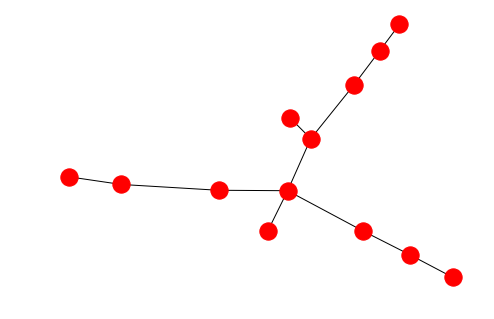

In [17]:
nx.draw(MST)

In [29]:
def ktree(G: nx.Graph, k: int) -> nx.Graph:
    mst = nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight")
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    while(len(mst.edges) < (len(mst.nodes) + k - 1)):
        for edge in edges:
            if not mst.get_edge_data(edge[0], edge[1]):
                mst.add_edge(edge[0], edge[1], weight=edge[2]["weight"])
    
    assert(len(mst.edges) < (len(mst.nodes) + k - 1))
    
    # TODO: step 0: make a copy of mst called ktree
    
    
    while ktree.degree[0] > 2*k:
        pass
        # TODO: step 1: store edges on node 0 (depot), ordered by highest weight
        
        # TODO: step 2: remove all edges on depot
        
        # TODO: step 3: label nodes according to their connected components
        
        # TODO: step 4: add those depot_edges again
        
        # TODO: step 5: REMEMBER ONLY COMPONENTS WITH 2+ EDGES TO DEPOT CAN BE DISCONNECTED
        # but they'll be changing during this execution
        # this is going to be a difficult but crucial step
        
        # TODO: step 6: for every edge between customers, compute a cost function w(c1, c2):
        # w(c1,c2) = G.get_edge_data(c1, c2)["weight"] - depot_edges[0][2]["weight"] if label(c1) == label(c2)
        # else G.get_edge_data(c1, c2)["weight"] - max(depot_edges[0][2]["weight"], depot_edge to label(c1)["weight"], depot_edge to label(c2)["weight"])
        # REMEMBER TO STORE THE COMBINATION PICKED (c1, c2, which depot_edge)
        
        # TODO: step 7: if min(w(c1,c2)) from label(c1) == label(c2):
        # remove depot_edges[0][2] from ktree
        # delete depot_edges[0][2]
        # ktree.add_edge(c1,c2,G.get_edge_data(c1, c2)["weight"])
        # ??? maybe ktree.add_edge(G.edges(c1,c2)) ???
        # else:
        # remove depot_edge from ktree
        # delete depot_edge
        # add best edge (according to min(w(c1,c2))) to ktree
        # for all edges which label == label(c2): label = label(c1) since they're now connected
        
    while ktree.degree[0] < 2*k:
        pass
        # TODO: I have no idea 
        
    assert ktree.degree[0] == 2*k
    for i in len(ktree.nodes):
        assert ktree.degree[i] == 2
        
    return ktree

In [18]:
sorted(G.edges(data=True), key=lambda x: x[2]['weight'])

[(9, 10, {'weight': 1.0}),
 (0, 5, {'weight': 1.4142135623730951}),
 (0, 7, {'weight': 1.4142135623730951}),
 (4, 6, {'weight': 1.4142135623730951}),
 (0, 4, {'weight': 2.23606797749979}),
 (0, 6, {'weight': 2.23606797749979}),
 (1, 3, {'weight': 2.23606797749979}),
 (4, 5, {'weight': 2.23606797749979}),
 (6, 7, {'weight': 2.23606797749979}),
 (9, 11, {'weight': 2.23606797749979}),
 (0, 10, {'weight': 2.8284271247461903}),
 (5, 7, {'weight': 2.8284271247461903}),
 (6, 8, {'weight': 2.8284271247461903}),
 (10, 11, {'weight': 2.8284271247461903}),
 (4, 7, {'weight': 3.0}),
 (5, 6, {'weight': 3.0}),
 (7, 8, {'weight': 3.0}),
 (1, 5, {'weight': 3.1622776601683795}),
 (5, 10, {'weight': 3.1622776601683795}),
 (7, 10, {'weight': 3.1622776601683795}),
 (8, 12, {'weight': 3.1622776601683795}),
 (0, 9, {'weight': 3.605551275463989}),
 (1, 4, {'weight': 3.605551275463989}),
 (2, 4, {'weight': 3.605551275463989}),
 (2, 6, {'weight': 3.605551275463989}),
 (3, 5, {'weight': 3.605551275463989}),
 (5

In [19]:
mst = nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight")
sorted(mst.edges(data=True), key=lambda x: x[2]['weight'])

[(9, 10, {'weight': 1.0}),
 (0, 5, {'weight': 1.4142135623730951}),
 (0, 7, {'weight': 1.4142135623730951}),
 (4, 6, {'weight': 1.4142135623730951}),
 (0, 4, {'weight': 2.23606797749979}),
 (1, 3, {'weight': 2.23606797749979}),
 (9, 11, {'weight': 2.23606797749979}),
 (0, 10, {'weight': 2.8284271247461903}),
 (6, 8, {'weight': 2.8284271247461903}),
 (1, 5, {'weight': 3.1622776601683795}),
 (8, 12, {'weight': 3.1622776601683795}),
 (2, 4, {'weight': 3.605551275463989})]

In [24]:
mst.get_edge_data(8, 9) == None

True

In [27]:
len(mst.nodes)

13